# Introduction:
Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.
## Datasets
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

The dataset has 24 columns and 195 records and it can be found in the UCI ML:
https://archive.ics.uci.edu/ml/datasets/parkinsons



In [446]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# STEP 1: LOAD DATA

First things first, we need to load the data from the `.csv` file. This is easily done with `pandas`.

In [447]:
#DataFlair - Read the data
df=pd.read_csv('parkinsons.data')

# STEP 2: FIRST LOOK AT THE DATASET

## STEP 2.1: General info, categorical variables

It is useful to take a quick look at the initial state of the dataset:

1. use `.info()`, `.describe()` method to get a first sense of the dimensions of the dataset and value of numeric variables;
2. focus on the categorical variables and also the class of the samples, to see if they are balanced.

In [448]:
# Get info about dataset
df.info()

# Describe dataset variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## STEP 2.2: Data Exploration

# Correlation
Draw heat map to look at the correlations between continuous variables

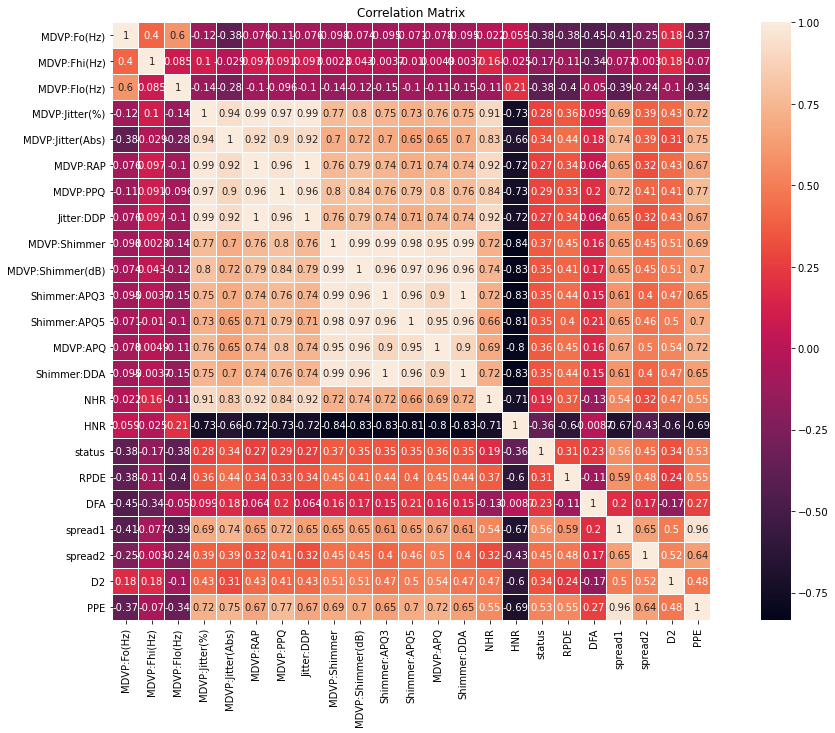

In [449]:
corrmat_df = df.corr()
plt.figure(figsize=(18,11))

sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## Boxplots

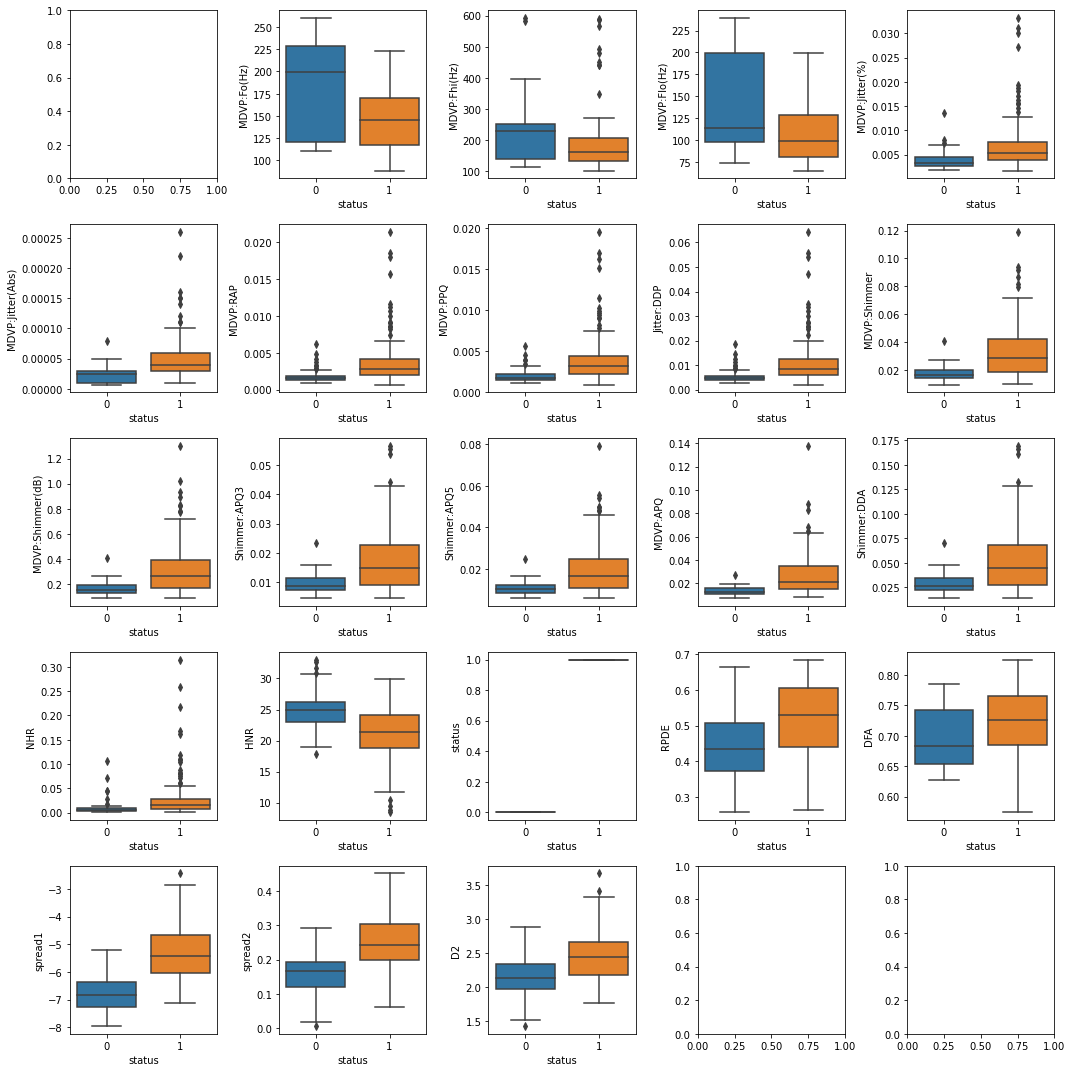

In [450]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

## STEP 3: Building a Model

In [451]:
X = df.drop(['status', 'name'], axis = 1)
y = df.status

In [452]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [453]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(X_train, y_train)*100
    acc_test = clf.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    
    return acc_train, acc_test, roc, correct, incorrect, cm

# STEP 3.1: Logistic regression

In [454]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

Y_pred_lr = clf_lr.predict(X_test)
print(clf_scores(clf_lr, Y_pred_lr))

(85.8974358974359, 87.17948717948718, 69.86607142857143, 34, 5, array([[ 3,  4],
       [ 1, 31]]))


/Users/vahida/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Standardization

In [455]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [456]:
#Scaling
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# numerical features
num_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_scaled[[i]])
    
    # transform the training data column
    X_train_scaled[i] = scale.transform(X_train_scaled[[i]])
    
    # transform the testing data column
    X_test_scaled[i] = scale.transform(X_test_scaled[[i]])

## Comapre train data with scaled train

In [457]:
#X_train.describe()

In [458]:
X_train_scaled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,...,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,8.084701e-16,-5.693451e-17,-1.579933e-16,2.618988e-16,-2.419717e-16,-7.970832e-17,-1.651101e-16,3.985416e-17,1.138690e-16,-3.985416e-17,...,3.074464e-16,2.846726e-17,5.693451e-18,5.067172e-16,1.081756e-16,-1.246866e-15,-6.077759e-16,1.679568e-16,-8.853317e-16,-1.850372e-16
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,...,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.572924e+00,-1.104233e+00,-1.199705e+00,-9.298629e-01,-1.068139e+00,-8.756653e-01,-9.048457e-01,-8.757960e-01,-1.036476e+00,-9.804519e-01,...,-9.525720e-01,-1.055359e+00,-5.828938e-01,-3.084070e+00,-2.323901e+00,-2.554121e+00,-2.006947e+00,-2.463417e+00,-2.393517e+00,-1.729221e+00
25%,-8.815449e-01,-7.009993e-01,-7.472381e-01,-5.712102e-01,-6.820096e-01,-5.436567e-01,-5.689804e-01,-5.437743e-01,-6.864633e-01,-6.835779e-01,...,-6.351772e-01,-7.164905e-01,-4.505359e-01,-6.218200e-01,-7.924725e-01,-8.392798e-01,-6.865966e-01,-6.003890e-01,-7.541272e-01,-7.590438e-01
50%,-1.316592e-01,-2.026310e-01,-3.067633e-01,-2.464127e-01,-3.849870e-01,-2.601924e-01,-2.645736e-01,-2.602989e-01,-3.779570e-01,-3.558599e-01,...,-3.514805e-01,-3.089146e-01,-3.253010e-01,4.335845e-02,-1.311925e-02,7.384321e-02,-3.885132e-02,-1.461083e-01,-6.169908e-02,-1.678489e-01
75%,7.377718e-01,3.746090e-01,5.539176e-01,2.196242e-01,2.090582e-01,1.758399e-01,2.174809e-01,1.748836e-01,4.400703e-01,3.741159e-01,...,3.242075e-01,3.428899e-01,3.343815e-02,7.098920e-01,8.627279e-01,7.929689e-01,5.312981e-01,5.643976e-01,5.142849e-01,5.007578e-01
max,2.550889e+00,5.019975e+00,2.664766e+00,5.731132e+00,6.446533e+00,6.322768e+00,6.001210e+00,6.324076e+00,4.792550e+00,5.275749e+00,...,6.569857e+00,4.127392e+00,7.554657e+00,2.473143e+00,1.769583e+00,1.956227e+00,2.921693e+00,2.690860e+00,3.416141e+00,3.503581e+00


## STEP 3.2: Logistic regression

In [459]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled, y_train)

Y_pred_lr = clf_lr.predict(X_test_scaled)
print(clf_scores(clf_lr, Y_pred_lr))

(26.282051282051285, 17.94871794871795, 77.00892857142857, 35, 4, array([[ 4,  3],
       [ 1, 31]]))


In [460]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
# lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_y_pred = lasso.predict(X_test_scaled)
print(r2_score(y_test, lasso_y_pred))
print(np.sqrt(mse(y_test, lasso_y_pred)))

-0.047154017857143016
0.39270342032042577


In [461]:
# # `X` is the feature set
# # `Y` is the target variable
# X = df.drop(['status', 'name'], axis = 1)
# y = df.status
# # Add a constant to the model because it's best practice
# # to do so every time!
# X = sm.add_constant(X)

# # Fit an OLS model using statsmodels
# results = sm.OLS(y, X).fit()

# # Print the summary results
# print(results.summary())


## STEP 3.3: KNN

In [462]:
#2. KNN

from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_scaled, y_train)

Y_pred_knn = clf_knn.predict(X_test_scaled)
print(clf_scores(clf_knn, Y_pred_knn))

(26.282051282051285, 17.94871794871795, 85.71428571428572, 37, 2, array([[ 5,  2],
       [ 0, 32]]))


In [463]:
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tools.eval_measures import mse, rmse

## STEP 3.3: Hyperparameter Tuning:
Finding the best K values

In [464]:
# KNN 
# Hyperparameter Tuning:
# Finding the best K value:

k_value = range(3, 21, 2)
test_rmse= []
train_rmse = []
test_accuracy = []
train_accuracy= []
X_train, y_train

for i in k_value:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    y_train_pred = knn.predict(X_train_scaled)
    y_train_rmse = np.sqrt(mse(y_train, y_train_pred))
    y_test_pred = knn.predict(X_test_scaled)
    y_test_rmse = np.sqrt(mse(y_test, y_test_pred))
    test_rmse.append(y_test_rmse)
    train_rmse.append(y_train_rmse)
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled, y_test))

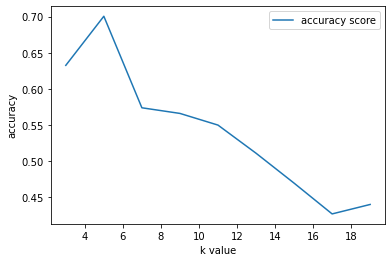

In [465]:
#plt.plot(k_value, train_accuracy, label = 'accuracy score')
plt.plot(k_value, test_accuracy, label = 'accuracy score')
plt.legend()
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

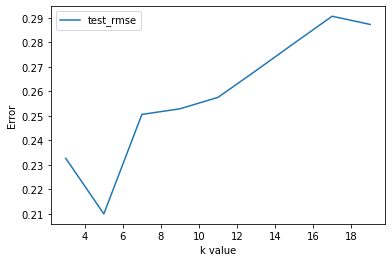

In [466]:
plt.plot(k_value, test_rmse, label = 'test_rmse')
plt.legend()
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()

## STEP 3.3: KNN:

In [467]:
#2. KNN

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train)

Y_pred_knn = clf_knn.predict(X_test_scaled)
print(clf_scores(clf_knn, Y_pred_knn))

(29.48717948717949, 28.205128205128204, 92.85714285714286, 38, 1, array([[ 6,  1],
       [ 0, 32]]))


## STEP 3.4: Naive Bayes:

In [468]:
#3. Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_scaled, y_train)

Y_pred_gnb = clf_gnb.predict(X_test_scaled)
print(clf_scores(clf_gnb, Y_pred_gnb))

(26.282051282051285, 17.94871794871795, 71.65178571428571, 28, 11, array([[ 5,  2],
       [ 9, 23]]))


## STEP 3.4: Sector Vector Machine:

In [469]:
#4. SVM

from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

Y_pred_svm = clf_svm.predict(X_test_scaled)
print(clf_scores(clf_svm, Y_pred_svm))

(73.71794871794873, 82.05128205128204, 71.42857142857143, 35, 4, array([[ 3,  4],
       [ 0, 32]]))


## STEP 4.1: Comparison

In [470]:
#Meta-classifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf_knn, clf_svm, clf_gnb], 
                          meta_classifier=lr)
sclf.fit(X_train_scaled, y_train)
for clf, label in zip([clf_knn, clf_svm, clf_gnb, sclf], 
                      ['KNN', 
                       'SVM', 
                       'Naive Bayes',
                       'StackingClassifier']):

    Y_pred = clf.predict(X_test_scaled)
    scores = clf_scores(clf, Y_pred)
    #scores = model_selection.cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    print(scores, label)

(29.48717948717949, 28.205128205128204, 92.85714285714286, 38, 1, array([[ 6,  1],
       [ 0, 32]])) KNN
(73.71794871794873, 82.05128205128204, 71.42857142857143, 35, 4, array([[ 3,  4],
       [ 0, 32]])) SVM
(26.282051282051285, 17.94871794871795, 71.65178571428571, 28, 11, array([[ 5,  2],
       [ 9, 23]])) Naive Bayes
(29.48717948717949, 28.205128205128204, 85.71428571428572, 37, 2, array([[ 5,  2],
       [ 0, 32]])) StackingClassifier


## STEP 4.2: Results & Conclusion

## Results

Model 1: Linear Regression

Receiver Operating Characteristic (ROC) = 77.00
Confusion Matrix : Positive: [4,3], Negative:[1,31]
Correct = TP + TN = 35
Incorrect = FP + FN = 4


Model 2: KNN

Receiver Operating Characteristic (ROC) = 92.85
Confusion Matrix : Positive: [5,2], Negative:[0,32]
Correct = TP + TN = 37
Incorrect = FP + FN = 2

Model 3: Support Vector Machine

Receiver Operating Characteristic (ROC) = 71.42
Confusion Matrix : Positive: [3,4], Negative:[0,32]
Correct = TP + TN = 35
Incorrect = FP + FN = 4

Model 4: Naive Bayes

Receiver Operating Characteristic (ROC) = 71.65
Confusion Matrix : Positive: [5,2], Negative:[9,23]
Correct = TP + TN = 28
Incorrect = FP + FN = 11

Based on the Receiver Operating Characteristic Model 2 KNN is the most suitable model with the highest ROC number over 92%.

## How this solution is valuable.
To build a model to predict the presence of Parkinson’s disease in the coming/new patients.

How the predictor works: 

When a new patient comes up, the model will look the training points/records and find the closest/most similar points to the new patient and make the average of the closest neighbors as its prediction.
* the predictions above 0.5 will be considered as 1.0 (PD) and below 0.5 will be considered as 0.0 (healthy).

In [471]:
# from sklearn.metrics import r2_score

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)
test_prediction = knn.predict(X_test)
num = len(test_prediction)
for i in range(num):
    if test_prediction[i] <= 0.5:
        test_prediction[i] = 0.0
    else:
        test_prediction[i] = 1.0


## Future Analysis and Consideration

The outcome is very promising, I would recommend gathering more data with more features related to the Parkinson's Disease.

I would need to explore more hyperparameters for each model such as using cross-validation for the regression model. Also, Possibly incorporate another model like Random Forest Regression.